# Projekt Indywidualny 2022/2023
Zadaniem tego projektu jest potwierdzenie posiadania przez Państwa umiejętności budowania modelu regresji na przykładzie danych zawierających ceny nieruchomości znajdujących się w pliku "domy.csv". W zadaniu należy wykorzystać wiedzę poznaną na laboratorium i wykładzie w tym metody regularyzacji, metody wyboru i tworzenia nowych zmiennych, określenie jakości modelu, metody optymalizacji.

Za projekt można zdobyć 50 pkt. Za każde zadanie można dostać od 0 do 5 pkt. Każde zadanie musi być opisane stosownymi komentarzami i podsumowane wnioskami wynikającymi z wykonanych obliczeń.

**!!! Do wykonania projektu nie możemy korzystać z żadnych dodatkowych pakietów niż poniższe 5 !!!**

Czas na wykonanie projektu - 31.12.2022 r.

In [696]:
# Wyczanie pakietów podstawowych
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [697]:
# Wczytanie danych
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
domy = pd.read_csv("domy.csv", sep=',', dtype=dtype_dict)
domy

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0263000018,20140521T000000,360000.0,3.0,2.50,1530.0,1131,3,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530.0,1509.0
21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310.0,5813,2,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830.0,7200.0
21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020.0,1350,2,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020.0,2007.0
21611,0291310100,20150116T000000,400000.0,3.0,2.50,1600.0,2388,2,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410.0,1287.0


### Podział danych zostanie dokonany zależnie od numeru indeksu

In [698]:
# !!!Jako random_state podaj swój numer indeksu!!!
numer_indeksu = 299034
ceny = domy['price']
domy.drop('price', axis=1, inplace=True)
domy_train, domy_test, ceny_train, ceny_test = train_test_split(domy, ceny, test_size=0.33, random_state=numer_indeksu)
cechy = domy.columns.values
cechy 

array(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15'], dtype=object)

In [699]:
domy['floors'] = domy['floors'].astype(float).copy()

## Zadanie 1
Dokonaj analizy posiadanych zmiennych. Zakresy zmienności, korelacje, skośność. Dane nieużyteczne jak np. id można pominąć.

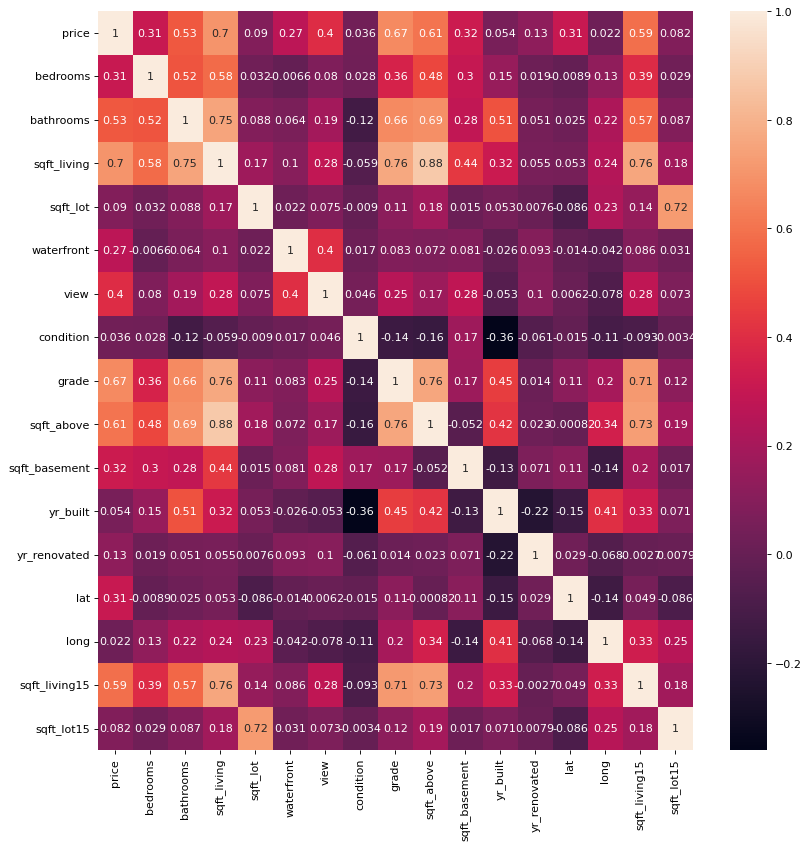

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


None
bedrooms          1.974300
bathrooms         0.511108
sqft_living       1.471555
sqft_lot         13.060019
floors            0.616177
waterfront       11.385108
view              3.395750
condition         1.032805
grade             0.771103
sqft_above        1.446664
sqft_basement     1.577965
yr_built         -0.469805
yr_renovated      4.549493
lat              -0.485270
long              0.885053
sqft_living15     1.108181
sqft_lot15        9.506743
dtype: float64


In [700]:
# wczytanie orygilanych danych
domy_org = pd.read_csv("domy.csv", sep=',', dtype=dtype_dict)
# ustalenie cech modelu
cechy2 = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
plt.figure(figsize=(12,12), dpi= 80)
# mapa korelacji
sn.heatmap(domy_org.corr(),annot = domy_org.corr())
plt.show()
# opis danych
print(display(domy[cechy2].describe()))
# skośność
print(domy[cechy2].skew())

Najbardziej skorelowane cechy ze sobą: sqft_living i sqft_above
Najbardziej skorelowana cecha z wyjściem: sqft_living

Korelacje cech między sobą nie są na tyle duże żeby miało to bardzo negatywny wpływ na wyniki. Dane natomiast różnią się znacząco rzędem wielości, co może mieć negatywny wpływ na uczenie. Dodatkowo najmniejsze zakresy wielkości mają cechy bedrooms, bathrooms, floors, zaś największe sqft_living, sqft_lot i inne sqft

Największą skośność posiada cecha sqft_lot, co czyni ją podejrzaną o bycie najgorszą - ma najmniejszy wpływ na wyjście, co pokazuje także jej bardzo mała korelacja

## Zadanie 2
Zaproponuj 5 nowych cech będących wynikiem przeprowadzonych w ramach Zadaniu 1 analiz lub doświadczeń.

In [701]:
from math import log, sqrt

domy['bedrooms_squared'] = domy['bedrooms'].apply(lambda x: x**2)
domy['bathrooms_squared'] = domy['bathrooms'].apply(lambda x: x**2)
domy['sqft_living_sqrt'] = domy['sqft_living'].apply(sqrt)
domy['sqft_lot_sqrt'] = domy['sqft_lot'].apply(sqrt)
domy['bed_bath_rooms'] = domy['bedrooms']*domy['bathrooms']


In [702]:
domy.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,bedrooms_squared,bathrooms_squared,sqft_living_sqrt,sqft_lot_sqrt,bed_bath_rooms
0,7129300520,20141013T000000,3.0,1.00,1180.0,5650,1.0,0,0,3,...,98178,47.5112,-122.257,1340.0,5650.0,9.0,1.0000,34.351128,75.166482,3.00
1,6414100192,20141209T000000,3.0,2.25,2570.0,7242,2.0,0,0,3,...,98125,47.7210,-122.319,1690.0,7639.0,9.0,5.0625,50.695167,85.099941,6.75
2,5631500400,20150225T000000,2.0,1.00,770.0,10000,1.0,0,0,3,...,98028,47.7379,-122.233,2720.0,8062.0,4.0,1.0000,27.748874,100.000000,2.00
3,2487200875,20141209T000000,4.0,3.00,1960.0,5000,1.0,0,0,5,...,98136,47.5208,-122.393,1360.0,5000.0,16.0,9.0000,44.271887,70.710678,12.00
4,1954400510,20150218T000000,3.0,2.00,1680.0,8080,1.0,0,0,3,...,98074,47.6168,-122.045,1800.0,7503.0,9.0,4.0000,40.987803,89.888820,6.00


Aby zwiększyć zakres wartości cech bedrooms i bathrooms (a tym samym ich wpływ na wynik), stworzono cechę która jest kwadratem ich wartości (zwiększa separację między nielicznymi sypialniami/łazienkami) oraz iloczynem ich obu (funkcja „interakcji”). Dodatkowo aby zmniejszyć wpływ cech sqft_lot i sqft_living dodano cechy które są ich pierwiastkiem (zmniejsza separację między dużymi wartościami powierzchni). 

## Zadanie 3
Dokonaj wizualiazji nowych cech i określ ich korelację.

In [704]:
cechy_nowe = ['bedrooms_squared', 'bathrooms_squared', 'sqft_living_sqrt', 'sqft_lot_sqrt', 'bed_bath_rooms']
# dodanie ceny w celu zbadania korelacji cech z wyjściem
tmp = domy[cechy_nowe].copy()
tmp['price'] = ceny

,bedrooms_squared,bathrooms_squared,sqft_living_sqrt,sqft_lot_sqrt,bed_bath_rooms
0,9.0,1.0000,34.351128,75.166482,3.00
1,9.0,5.0625,50.695167,85.099941,6.75
2,4.0,1.0000,27.748874,100.000000,2.00
3,16.0,9.0000,44.271887,70.710678,12.00
4,9.0,4.0000,40.987803,89.888820,6.00


None


,bedrooms_squared,bathrooms_squared,sqft_living_sqrt,sqft_lot_sqrt,bed_bath_rooms
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,12.227548,5.065322,44.596878,101.302703,7.498022
std,9.946235,3.706663,9.540568,69.605704,4.227676
min,0.000000,0.000000,17.029386,22.803509,0.000000
25%,9.000000,3.062500,37.775654,70.992957,4.500000
50%,9.000000,5.062500,43.703547,87.281155,7.000000
75%,16.000000,6.250000,50.497525,103.382784,10.000000
max,1089.000000,64.000000,116.361506,1285.052139,67.500000


None


<AxesSubplot:>

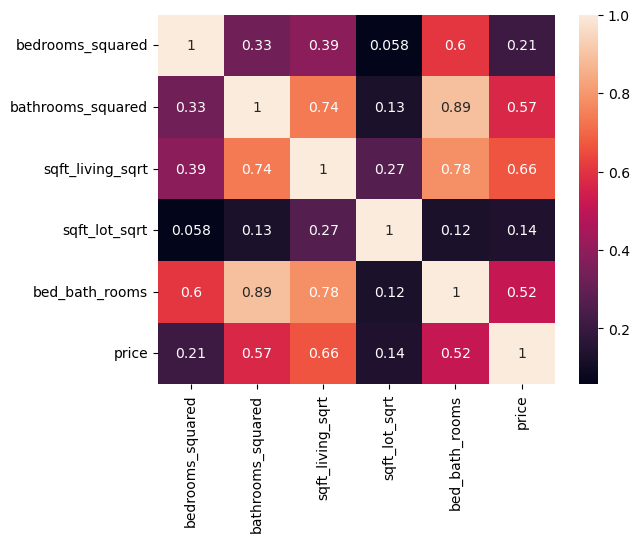

In [705]:
print(display(domy[cechy_nowe].head()))
print(display(domy[cechy_nowe].describe()))
sn.heatmap(tmp.corr(),annot = tmp.corr())

Jak można było podejrzewać najbardziej skorelowane cechy to bed_bath_sqrt i bathrooms_squared. Wysoką korelację wykazują także bed_bath_rooms i sqft_living_sqrt (im więcej łazienek i pokoi tym więcej powierzchni).

Najbardziej skorelowana z wyjściem okazała się cecha sqft_living_sqrt, co także jest zgodne z przypuszczeniami. 


## Zadanie 4

Wyznacz liniową zależność między 3 najbardziej skorelowanymi ze zmienną opisywaną zmiennymi opisującymi (wszystkie podane cechy + 5 nowo utworzonych). Do wyznaczenia liniowej zależności między cechami, a zmienną opisywaną wykorzystaj pseudoinwersję.

In [707]:

most_corr = ['sqft_living', 'grade', 'sqft_living_sqrt']
corr_pseudo = np.linalg.pinv(domy[most_corr]) @ ceny
corr_pseudo


array([   499.5518338 , 125094.8113781 , -32714.05867619])

y - zmienna opisywana

x - wartości cech

a - wartości wag

b - wyraz wolny (pomijalny)
$$ Zależność~ liniowa $$
$$ y=ax+b $$

Dla sqft_living: $a=499.5518338$

Dla grade: $ a=125094.8113781 $

Dla sqft_living_sqrt: $ a=-32714.05867619 $

##### Zależność liniowa pokazuje jak bardzo poszczególna cecha jest powiązana liniowo ze zmienną opisywaną. W tym przypadku największe powiązanie ma grade

## Zadanie 5
Napisz metodę regresji krokowej w tył i za jej pomocą wybierz 5 najbardziej wartościowych cech.

In [710]:
# dodanie do pozostałych cech cechy nowoutworzone
cechy3 = cechy2 + cechy_nowe

# implementacja regresji krokowej w tył
def regr( dane, y, cechy):
#     wagi
    w = np.zeros(len(cechy))
    error = np.sum((y-np.dot(dane[cechy],w))**2)/len(y)
    error_max = 0
    cecha_zla = ''
#     iterujemy po każdej cesze wyłączając za każdym razem jedną z nich
    for j, cecha in enumerate(cechy):
#         wyznaczamy wagi
        w = np.dot(np.linalg.pinv(dane[cechy[:j] + cechy[j+1:]]), y)
#     wyznaczamy błąd
        error = np.sum((y-np.dot(dane[cechy[:j] + cechy[j+1:]],w))**2)/len(y)
#         jeżeli błąd się zwiększył to dana cecha jest gorsza od pozostałych
        if error>error_max:
            error_max = error
            cecha_zla = cecha
#     zwracamy najgorszą cechę
    return cecha_zla

# tworzymy listę cech którą będziemy uzupełniać od najgorszej do najlepszej
cechy_najgorsza_najlepsza=[]
c=cechy3.copy()

for i in range(len(cechy3)):
    cecha = regr(domy, ceny, c)
    cechy_najgorsza_najlepsza.append(cecha)
#     za każdym razem usuwamy ze zbioru cechę już wyznaczoną jako najgorszą
    c.remove(cecha)


# print(cechy_najgorsza_najlepsza)

# bierzemy 5 ostatnich cech z listy, które są najlepsze
najlepsze_cechy_5 = cechy_najgorsza_najlepsza[-5:]
print("5 najbardziej wartosciowych cech: ", cechy_najgorsza_najlepsza[-5:])


5 najbardziej wartosciowych cech:  ['bathrooms', 'floors', 'sqft_living', 'sqft_above', 'sqft_basement']


Metoda regresji krokowej w tył różni się od metody w przód tym, że wyznaczamy najgorszą (a nie najlepszą) cechę. Dlatego też należało dodatkowo posortować wyniki, aby otrzymać wymagane 5 najlepszych, którymi są: 'bathrooms', 'floors', 'sqft_living', 'sqft_above', 'sqft_basement'.

## Zadanie 6
Dokonaj normalizacji cech (wszystkie podane + 5 zaproponowanych w Zadaniu 1) i przy pomocy metody Lasso lub LARS (metody mają zostać samodzielnie zaimplementowane) wybierz 5 najbardziej wartościowych cech.

**!!! Przy przekształceniach unikaj korzystania z informacji zawartej w zbiorze walidacyjnym i testowym !!!**

Zgodnie ze wzorem
$$ normalizator = \sqrt{\sum_{i=1}^Nh_j(x_i)^2} $$
$$ \underline{h}_j(x_k) = \frac{h_j(x_k)}{normalizator}, $$

In [711]:
# funkcja normalizująca dane
def norm(dane, cechy):
    dane2 = dane.copy()
    for cecha in cechy:
        normalizator=sqrt(sum(dane[cecha].apply(lambda x: x**2)))
        dane2[cecha]=dane[cecha]/normalizator
    return dane2
        

In [712]:
# podział danych na treningowe i testowe
domy_train, domy_test, ceny_train, ceny_test = train_test_split(domy[cechy3], ceny, test_size=0.33, random_state=numer_indeksu)

In [713]:
# normalizacja danych
domy_norm = norm(domy_train[cechy3], cechy3)

In [714]:
domy_norm.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_renovated,lat,long,sqft_living15,sqft_lot15,bedrooms_squared,bathrooms_squared,sqft_living_sqrt,sqft_lot_sqrt,bed_bath_rooms
count,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,...,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000
mean,0.008024,0.007816,0.007605,0.002909,0.007814,0.000704,0.002421,0.008163,0.008214,0.007547,...,0.001711,0.008310,-0.008310,0.007859,0.003586,0.007276,0.006725,0.008127,0.006867,0.007256
std,0.002163,0.002823,0.003350,0.007785,0.002828,0.008281,0.007950,0.001557,0.001262,0.003480,...,0.008132,0.000024,0.000010,0.002701,0.007497,0.004016,0.004882,0.001735,0.004680,0.004052
min,0.000000,0.000000,0.001058,0.000101,0.005219,0.000000,0.000000,0.002393,0.001072,0.001221,...,0.000000,0.008240,-0.008331,0.001577,0.000183,0.000000,0.000000,0.003099,0.001549,0.000000
25%,0.007133,0.006459,0.005217,0.000988,0.005219,0.000000,0.000000,0.007178,0.007501,0.005053,...,0.000000,0.008295,-0.008318,0.005888,0.001437,0.005360,0.004062,0.006883,0.004842,0.004346
50%,0.007133,0.008304,0.007004,0.001481,0.007829,0.000000,0.000000,0.007178,0.007501,0.006611,...,0.000000,0.008312,-0.008311,0.007311,0.002149,0.005360,0.006715,0.007975,0.005930,0.006760
75%,0.009511,0.009227,0.009339,0.002076,0.010439,0.000000,0.000000,0.009571,0.008573,0.009349,...,0.000000,0.008331,-0.008304,0.009365,0.002841,0.009529,0.008290,0.009209,0.007020,0.009657
max,0.026154,0.029525,0.049393,0.226424,0.018268,0.098058,0.041574,0.011963,0.013931,0.039626,...,0.040747,0.008348,-0.008249,0.024540,0.245534,0.072065,0.084890,0.021179,0.073316,0.054081


Jak widać wyżej dane zostały prawidłowo znormalizowane (są z przedziału (-1,1))

In [715]:
# metoda lasso
def lasso(X, y, lamb):
# wagi początkowe jako wektor jedynek
    w = np.ones(X.shape[1])
    
# wyznaczanie wag powtrzamy 20 razy
    for i in range(20):
        best_feature = ''
        for j in range(X.shape[1]):
# wyznaczamy błąd
            error = y - np.dot(X, w)
# obliczamy cząstkowe gradientu funkcji kosztu
            z = np.sum(X.iloc[:,j].apply(lambda x: x**2))
            ro = np.sum(np.dot(( error + np.dot(w[j], X.iloc[:,j]) ), X.iloc[:,j]))
# w zależności od wybranego współczynnika lambda aktualizujemy wagi
            if(ro<(-lamb)):
                w[j]=(ro+lamb)/z
            elif(ro>=(-lamb) and ro<=lamb):
                w[j]=0
            else:
                w[j]=(ro-lamb)/z
# jeżeli zostanie 5 niezerowych wag przerywamy operację
        if(np.count_nonzero(w)<=5):
            break

    return w

In [716]:
# wyznaczamy wagi przy pomocy metody lasso
w_l = lasso(domy_norm, ceny_train, 8e6)
print(w_l)
# tworzymy listę najlepszych wag
najlepsze_cechy_lasso=[]
# jeżeli któraś z wag jest niezerowa dodajemy cechę o danym indeksie do listy
for i in range(domy_norm.shape[1]):
    if w_l[i]!=0:        
        najlepsze_cechy_lasso.append(domy_norm.iloc[:,i].name)
najlepsze_cechy_lasso

[58534259.89433194  5252570.11722957  3657094.56239046        0.
        0.          2004008.68048471  6051566.9372127         0.
        0.                0.                0.                0.
        0.                0.                0.                0.
        0.                0.                0.                0.
        0.                0.        ]


['bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view']

Z pomocą metody lasso zostało wyznaczonych 5 najlepszych cech: 'bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view'. Wybór wygląda sensownie - są to cechy, na które najbardziej zwracamy uwagę przy kupnie domu. Należy zauważyć, że wagi mają dość duże wartości (podobnie było w zależności liniowej).

## Zadanie 7
Zaimplementuj metodę spadku gradientów dla regularyzacji grzebietowej. Zabezpiecz się przed zbyt dużym współczynnikiem uczenia, badając zbieżność w każdym kroku i w razie potrzeby zmniejszając współczynnik uczenia $\sqrt{2}$ razy.

In [717]:
# metoda spadku gradientów dla regularyzacji grzbietowej
def gradient_descent(X, y, step_size, tolerance, lamb):
    converged = False 
    count = 0
# inicjacja wag jako zera
    w = np.zeros(X.shape[1])
# początkowa wartość gradientu
    gradient_magnitude_last = 99999999999999999999999999999999999
    while count != 10000:
#         zwiększenie kroku
        count += 1
#         wyznaczenie wartości przewidywanej
        predict = np.dot(X,w)
#     wyznaczenie błędu
        err_pred = predict - y
#     początkowa wartość sumy gradientów
        gradient_sum_squares = 0
    
        for i in range(len(w)):
#             obliczamy pochodną po wadze
            pochodna = 2 * np.dot(err_pred, X.iloc[:,i]) + 2*lamb*w[i] 
            gradient_sum_squares = gradient_sum_squares + (pochodna**2)
#         aktualizujemy wagi z danym współczynnikiem uczenia
            w[i] = w[i] - np.dot(step_size, pochodna)
#     obliczamy gradient
        gradient_magnitude = sqrt(gradient_sum_squares)
#         jeżeli gradient jest mniejszy niż tolerancja przerywamy proces
        if gradient_magnitude < tolerance:
            break
#             jeżeli gradient jest większy od poprzedniego zmniejszamy współczynnik uczenia
        if gradient_magnitude > gradient_magnitude_last:
            step_size = step_size/sqrt(2)
#             print("delta:", gradient_magnitude-gradient_magnitude_last)
        gradient_magnitude_last = gradient_magnitude
        
    print(count)
    print(w)
    return(w)

In [718]:
# wywołanie funkcji    
gradient_descent(domy_norm[cechy3], ceny_train, 1e-2, 2.5e-6, 0.32)

4182
[  459624.7344877   3305371.48939398 10336643.6586553    166212.44097834
  3117182.25871063  3996871.08131126  7330865.49652499  2184402.04134656
  5729603.04500531 10435855.56377805  5539941.04053044   331116.74192356
  2653658.61200851   670843.57872668  -569533.76937994  7852317.64118997
  -478719.74892707   730219.50278875  8860169.69924128  4698216.75825528
   725310.00705351  4337955.23005413]


array([  459624.7344877 ,  3305371.48939398, 10336643.6586553 ,
         166212.44097834,  3117182.25871063,  3996871.08131126,
        7330865.49652499,  2184402.04134656,  5729603.04500531,
       10435855.56377805,  5539941.04053044,   331116.74192356,
        2653658.61200851,   670843.57872668,  -569533.76937994,
        7852317.64118997,  -478719.74892707,   730219.50278875,
        8860169.69924128,  4698216.75825528,   725310.00705351,
        4337955.23005413])

Zbieżność metody spadku gradientów dla regularyzacji grzbietowej jest bardzo zależna od wyboru współczynnika uczenia oraz danych wejściowych. W celu szybszej zbieżności dane zostały znormalizowane, w przeciwnym wypadku proces trwał bardzo długo. Istotne okazały się także wagi początkowe. Dla wartości nieznormalizowanych najlepie sprawdzały się duże wartości początkowe i mały współczynnik uczenia. Dla wartości znormalizowanych sprawdzały się zerowe wartości początkowe i duży współczynnik uczenia. 

### Zadanie 8
Dla 5 wybranych w Zadaniu 5 cech dokonaj doboru współczynnika regularyzacji dla metody grzbietowej. 

*Skorzystaj z własnej implementacji regresji z Zadania 7. Zacznij od wysokiego współczynnika uczenia.*

10000
[-5049258.55914499  1126739.04480748 33643469.05615629 35850496.14778016
 11056911.38136711]
9835
[ -813638.71208746  1465712.28171012 31469481.73059395 33392752.2383799
 10864891.857817  ]
7992
[ 1934507.77415573  2095823.27179122 29837508.28005285 31527854.24503163
 10794459.5028643 ]
5813
[ 5308937.27046313  3474495.03431112 27489141.38378978 28821140.43469412
 10778893.87648732]
3762
[ 8646345.16695436  5713269.39840426 24605481.9846448  25476907.78774147
 10835826.67369971]
2219
[11247902.70561222  8300427.26295371 21620075.41858473 22024140.08196873
 10859739.4515861 ]
1257
[12721374.70390306 10358140.86690049 18898823.97152412 18940700.66758211
 10645295.86841142]
691
[12963900.5530632  11264366.72623406 16423390.81714243 16257058.40717121
 10001354.47071193]
365
[11995487.87774908 10826570.11696942 13865158.62773082 13623658.24314479
  8817621.32749862]
186
[ 9964147.9181791   9183036.44803829 10956830.02028358 10726046.1254112
  7115899.38496078]
93
[7319224.18823016 682

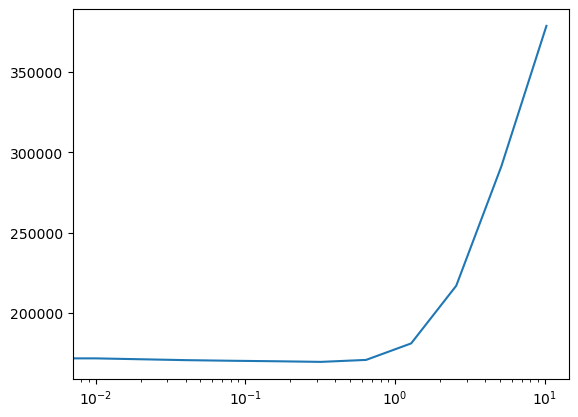

0.32

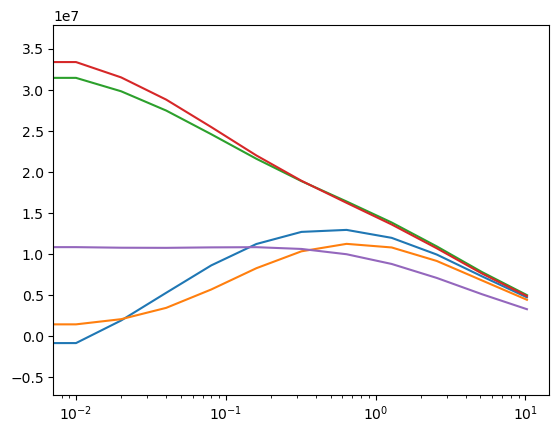

In [719]:
# lista wartości współczynnika lambda [0,0.01,0.02,0.04,0.08,⋯,10] 
lambd = []
lambd.append(0.0)
i = 0.01
while(i<12):
    lambd.append(i)
    i = i * 2

# funkcja rysująca wykresy błędów od wartości lambda i wagi modelu dla różnych współczynników  
def draw_for_lambdas(lambd,X,y):
#     lista błędów dla zbioru treningowego
    traintab = []
#     lista wag
    w = []
#     błąd początkowy
    error_min=9999999999999999999999
#     początkowa najlepsza lambda
    lamb_best=0
    
    for l in lambd:
        wi=gradient_descent(X, y, 1e-2, 2.5e2, l)
        error = (abs(np.dot(X,wi)-y)).mean()
        traintab.append(error)
        w.append(wi)
#         jeżeli błąd jest mniejszy od najmniejszego aktualizujemy najmniejszy błąd i najlepszą wartość lambda
        if (error<error_min):
            error_min=error
            lamb_best=l
# wykres błędy od wartości współczynnika
    plt.semilogx(lambd,traintab)
    plt.show()
# wykres wag od wartości współczynnika
    plt.semilogx(lambd,w)
    
    return lamb_best
    
    

lamb_best=draw_for_lambdas(lambd,domy_norm[najlepsze_cechy_5],ceny_train)
lamb_best

In [720]:
lamb_best

0.32

Jak można odczytać z wykresu błędów to początkowo błąd nieznacznie maleje wraz ze wzrostem wartości współczynnika. Następnie osiąga minimum i zaczyna rosnąć. Najlepsza lambda dla której błąd osiągnął minimum to 0.32

## Zadanie 9
Wytrenuj 5 modeli:
1. Wykorzystujący wszystkie cechy dane w zbiorze.
2. Wykorzystujący wszystkie cechy dane w zbiorze + 5 zaproponowanych.
3. Wykorzystujący 5 cech wybranych regresją krokową w tył.
4. Wykorzystujące tylko cechy wybrane dzięki metodzie Lasso.
5. Wykorzystujące cechy wybrane w metodzie Lasso i poddane regularyzacji grzbietowej dla wybranego współczynnika regularyzacji.

In [727]:
# funkcja ucząca model wykorzystując regresję liniową
def model_train(X_train, y_train):
    pinw = np.linalg.pinv(X_train)
    w = np.dot(pinw,y_train)
    return(w)


cechy2 = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
cechy_nowe = ['bedrooms_squared', 'bathrooms_squared', 'sqft_living_sqrt', 'sqft_lot_sqrt', 'bed_bath_rooms']
cechy3 = cechy2 + cechy_nowe
cechy_regr_krok = ['bathrooms', 'floors', 'sqft_living', 'sqft_above', 'sqft_basement']
cechy_lasso = ['bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view']

# podział danych na treningowe i testowe oraz ich normalizacja
domy_train, domy_test, ceny_train, ceny_test = train_test_split(domy[cechy3], ceny, test_size=0.33, random_state=numer_indeksu)
domy_train_norm = norm(domy_train[cechy3], cechy3)
domy_test_norm = norm(domy_test[cechy3], cechy3)

# listy cech dla poszczególnych modeli
cechy_model1 = cechy2
cechy_model2 = cechy3
cechy_model3 = cechy_regr_krok
cechy_model4 = cechy_lasso
cechy_model5 = cechy_lasso

# trenowanie modeli znormalizowanymi danymi
model1 = model_train(domy_train_norm[cechy_model1], ceny_train)
model2 = model_train(domy_train_norm[cechy_model2], ceny_train)
model3 = model_train(domy_train_norm[cechy_model3], ceny_train)
model4 = model_train(domy_train_norm[cechy_model4], ceny_train)
model5 = gradient_descent(domy_train_norm[cechy_model5], ceny_train, 1e-2, 2.5e-6, 0.32)

print("Model 1:",model1)
print("Model 2:",model2)
print("Model 3:",model3)
print("Model 4:",model4)
print("Model 5:",model5)

3909
[14717476.54387425 19409208.07206012 26724268.88911914  4168849.65310623
  9844824.11414974]
Model 1: [-1.61234288e+07  1.28485993e+07  2.05708817e+07 -1.71215560e+05
  3.10192862e+06  4.93434038e+06  5.16121786e+06  1.03263112e+07
  1.02962946e+08  2.23247117e+07  5.26376682e+06 -7.81019618e+08
  8.37268348e+05  2.73874068e+09  2.04969069e+09  2.49635062e+06
 -1.67542190e+06]
Model 2: [ 1.25962069e+07 -6.85757736e+06  6.40973968e+07  3.76779240e+06
  3.01350714e+06  5.08002056e+06  4.35139180e+06  1.49644126e+07
  1.04861802e+08  6.88811427e+07  1.89225872e+07 -6.55096868e+08
  1.54041757e+06  2.74828851e+09  2.08577695e+09  1.04867143e+07
 -4.09722572e+05  1.32027608e+05  2.37941932e+07 -2.12436975e+08
 -9.54196202e+06 -2.02264368e+07]
Model 3: [-5069804.15143401  1137011.76595632 33647961.88227291 35854952.21193285
 11059615.02436278]
Model 4: [-13423924.5085572    7089235.77888271  74652041.85161981
   4565466.90946757   7383280.91091361]
Model 5: [14717476.54387425 19409208.0

Można zauważyć że największe wartości wag powstały dla modelu 1 i 2 (ze wszystkimi podstawowymi cechami i wszystkimi wraz z 5 zaproponowanymi). Pozostałe modele posiadają zbliżone wartości wag. Wszystkie wartości wag są znacząco duże.

## Zadanie 10
Dokonaj oceny i porównania modeli z Zadania 9. Wybierz najlepszy model.

In [728]:
# błędy treningowe dla wszystkich modeli
error_train_1 = np.mean((ceny_train - np.dot(domy_train_norm[cechy_model1],model1)).apply(lambda x: x**2))
error_train_2 = np.mean((ceny_train - np.dot(domy_train_norm[cechy_model2],model2)).apply(lambda x: x**2))
error_train_3 = np.mean((ceny_train - np.dot(domy_train_norm[cechy_model3],model3)).apply(lambda x: x**2))
error_train_4 = np.mean((ceny_train - np.dot(domy_train_norm[cechy_model4],model4)).apply(lambda x: x**2))
error_train_5 = np.mean((ceny_train - np.dot(domy_train_norm[cechy_model5],model5)).apply(lambda x: x**2))

print(error_train_1)
print(error_train_2)
print(error_train_3)
print(error_train_4)
print(error_train_5)

41794827825.93573
37059964838.055
67956396795.90324
60075895628.201805
73445251521.06125


Najmniejszy błąd uczenia okazał się dla modelu ze wszystkimi cechami łącznie z 5 zaproponowanymi. Model ten operuje na największej ilości danych ze wszystkich (podejrzenie przeuczenia). Największy błąd uczenia powstał dla modelu z regularyzacją grzbietową, co jest logiczne, gdyż regresja grzbietowa pomaga uniknąć przeuczenia, co objawia się wyższym błędem uczenia.

In [729]:
# błędy testowe dla wszystkich modeli
error_test_1 = np.mean((ceny_test - np.dot(domy_test_norm[cechy_model1],model1)).apply(lambda x: x**2))
error_test_2 = np.mean((ceny_test - np.dot(domy_test_norm[cechy_model2],model2)).apply(lambda x: x**2))
error_test_3 = np.mean((ceny_test - np.dot(domy_test_norm[cechy_model3],model3)).apply(lambda x: x**2))
error_test_4 = np.mean((ceny_test - np.dot(domy_test_norm[cechy_model4],model4)).apply(lambda x: x**2))
error_test_5 = np.mean((ceny_test - np.dot(domy_test_norm[cechy_model5],model5)).apply(lambda x: x**2))

print(error_test_1)
print(error_test_2)
print(error_test_3)
print(error_test_4)
print(error_test_5)

113716513704.82149
107880745952.94083
135506532737.15628
127494152674.30753
98999108329.24751


Najmniejszy błąd testowania wychodzi tym razem dla modelu z regularyzacją grzbietową, a największy dla modelu 3 wykorzystującego cechy wybrane dzięki regresji krokowej w tył. Model 5 wypada lepiej od pozostałych aż o jeden rząd wielkości, co pokazuje jego skuteczność. 
Zatem najlepszym modelem dla tych danych jest model 5 (z regresją grzbietową), który skutecznie dobrał wagi zapobiegając równocześnie nadmiernemu dopasowaniu do zbioru uczącego.